In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir ='/kaggle/input/dogs-cats-images/dataset/training_set'
test_dir ='/kaggle/input/dogs-cats-images/dataset/test_set'

train_cats_dir = os.path.join(train_dir,'cats')# directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir,'dogs')# directory with our training dog pictures


test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

In [3]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_test = len(os.listdir(test_cats_dir))
num_dogs_test = len(os.listdir(test_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_test = num_cats_test + num_dogs_test

In [4]:
print('total training cat images:', num_cats_train)
print('total training dog images:', num_dogs_train)

print('total test cat images:', num_cats_test)
print('total test dog images:', num_dogs_test)
print("--")
print("Total training images:", total_train)
print("Total tset images:", total_test)

total training cat images: 4000
total training dog images: 4000
total test cat images: 1000
total test dog images: 1000
--
Total training images: 8000
Total tset images: 2000


<center>
  <h1 style="background-color:588157; color:a3b18a; font-size:40px; font-weight:bold; font-family:Times New Roman; border:3px a3b18a;">Setting Model Parameters </h1>
</center>


In [5]:
BATCH_SIZE = 100 # Number of training examples to process before updating our models variables
IMAGE_SIZE = 150 ## Our training data consists of images with width of 150 pixels and height of 150 pixels

In [6]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [7]:
image_gen = ImageDataGenerator(rescale=1.0/255,horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 8000 images belonging to 2 classes.


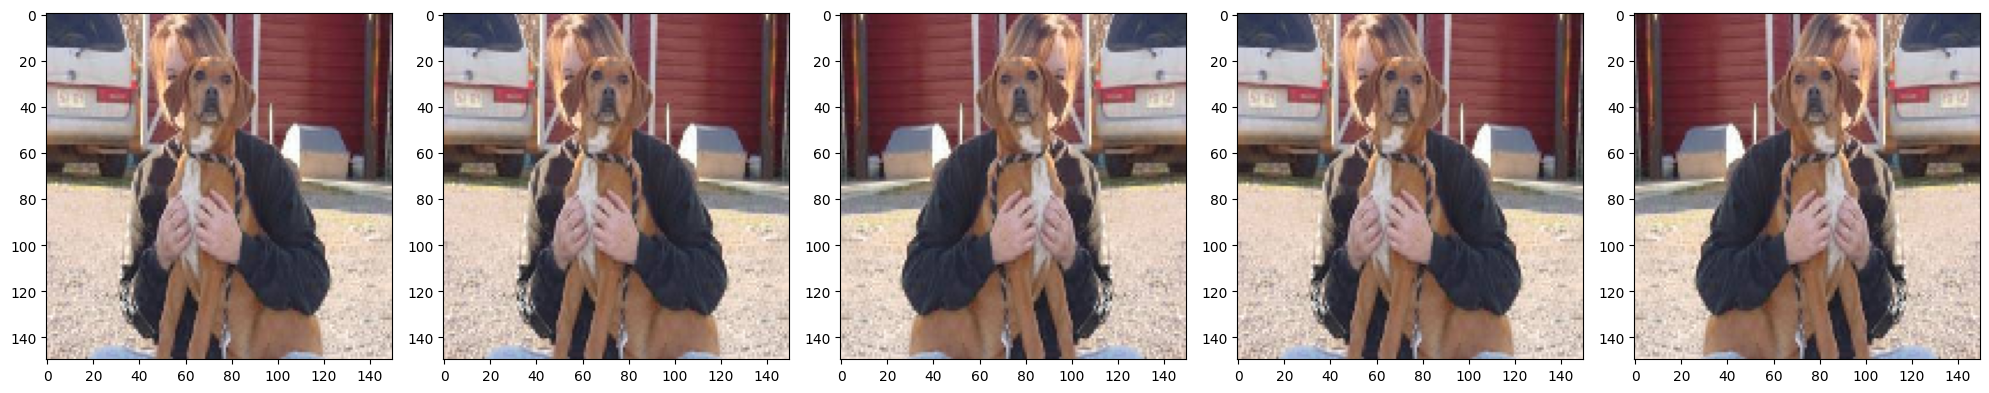

In [8]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [9]:
image_gen = ImageDataGenerator(rescale=1.0/255,rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 8000 images belonging to 2 classes.


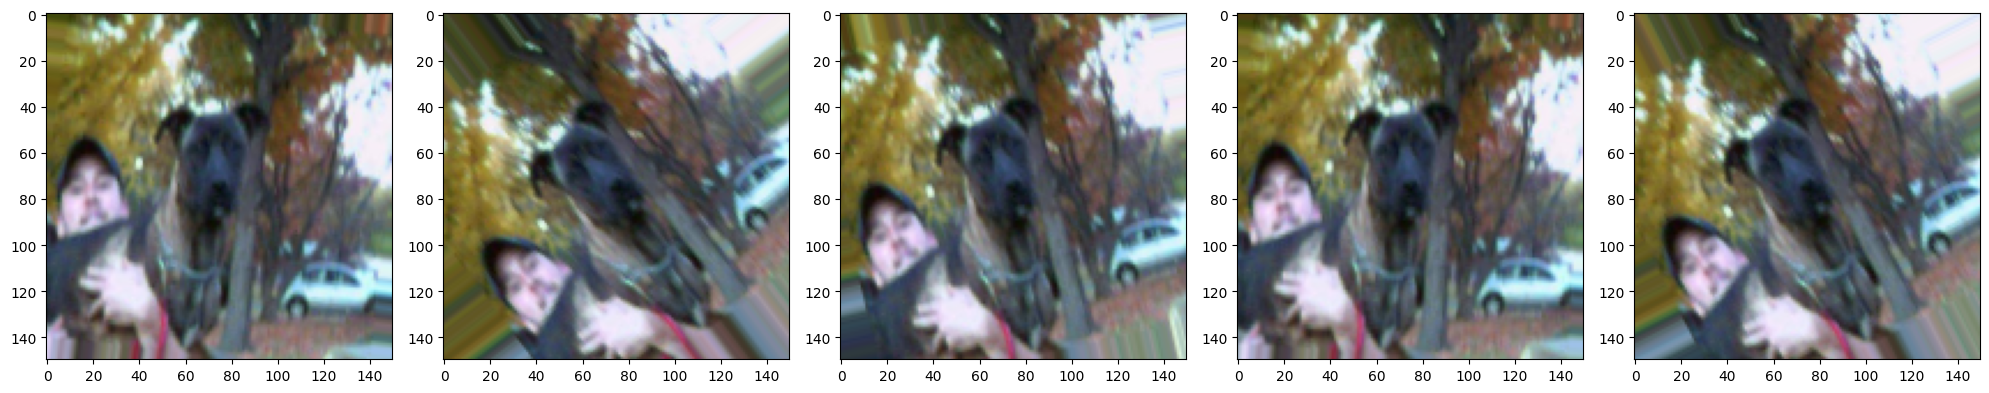

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE))


Found 8000 images belonging to 2 classes.


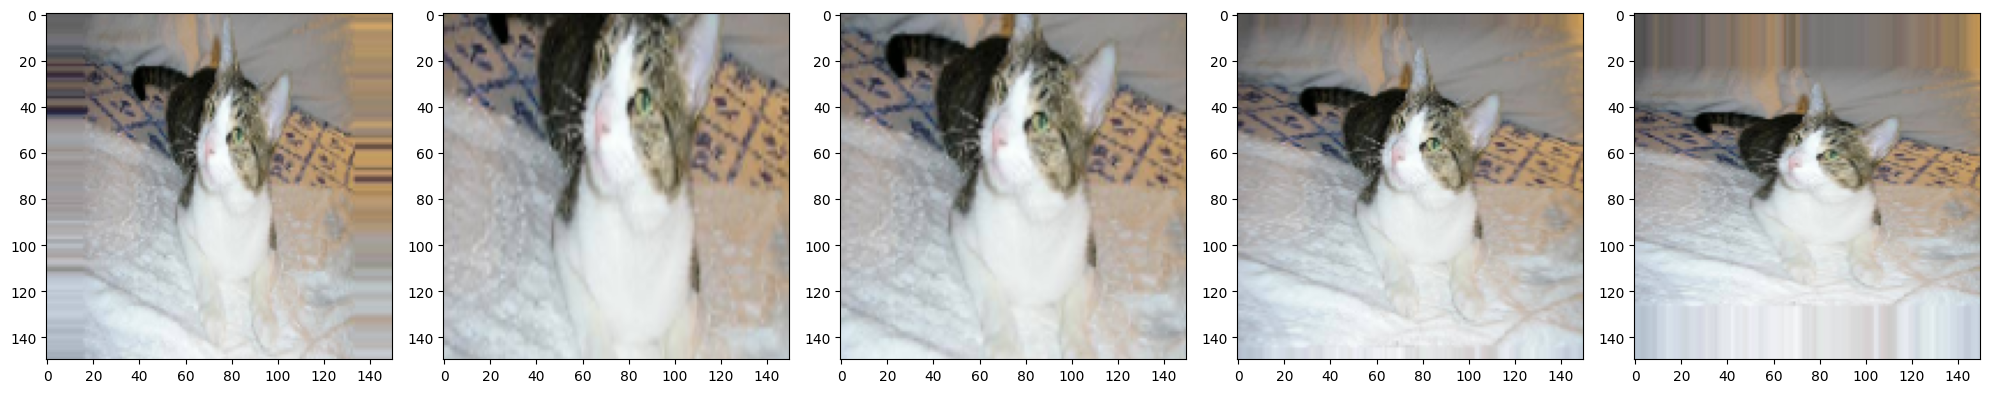

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [13]:
image_gen_train = ImageDataGenerator(rescale=1.0/255,
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                     class_mode='binary')

Found 8000 images belonging to 2 classes.


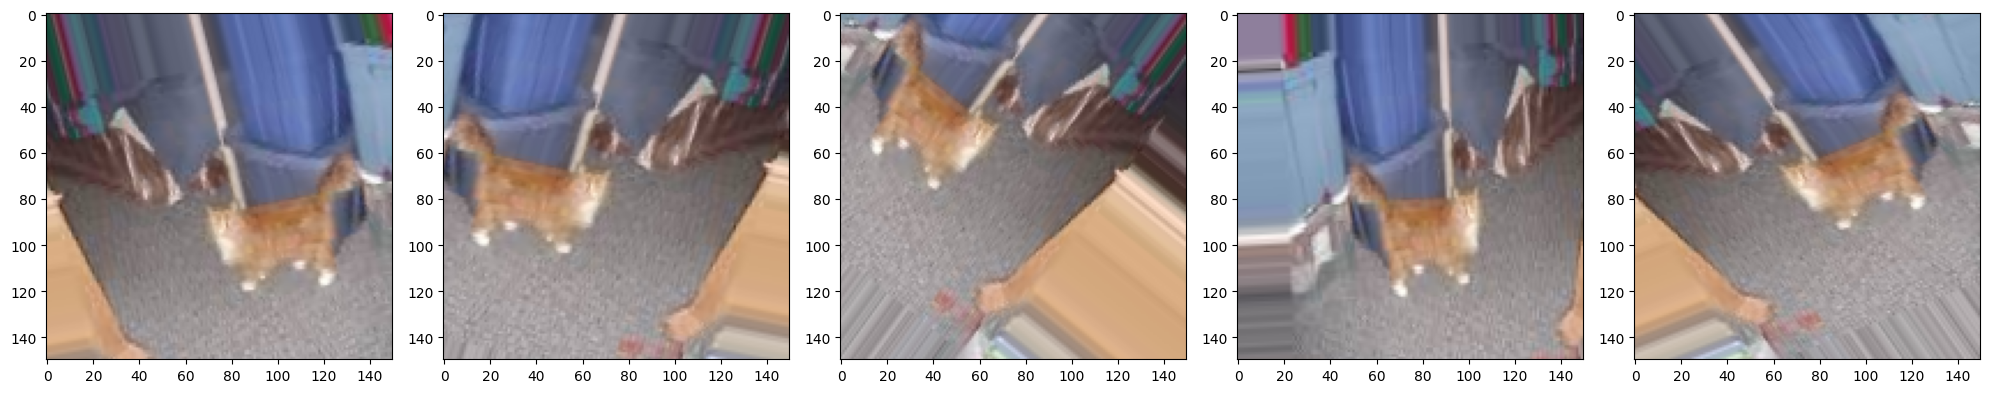

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [15]:
image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2)
])

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [19]:
EPOCHS=40

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(total_test / float(BATCH_SIZE))))

/tmp/ipykernel_23/2077266339.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/40
80/80 [==============================] - 109s 1s/step - loss: 0.7491 - accuracy: 0.5121 - val_loss: 0.6974 - val_accuracy: 0.4925
Epoch 2/40
80/80 [==============================] - 55s 682ms/step - loss: 0.6933 - accuracy: 0.5131 - val_loss: 0.6844 - val_accuracy: 0.5705
Epoch 3/40
80/80 [==============================] - 55s 684ms/step - loss: 0.6878 - accuracy: 0.5404 - val_loss: 0.6860 - val_accuracy: 0.5470
Epoch 4/40
80/80 [==============================] - 55s 690ms/step - loss: 0.6864 - accuracy: 0.5489 - val_loss: 0.6814 - val_accuracy: 0.5560
Epoch 5/40
80/80 [==============================] - 54s 680ms/step - loss: 0.6804 - accuracy: 0.5661 - val_loss: 0.6638 - val_accuracy: 0.5820
Epoch 6/40
80/80 [==============================] - 56s 697ms/step - loss: 0.6769 - accuracy: 0.5666 - val_loss: 0.6674 - val_accuracy: 0.5625
Epoch 7/40
80/80 [==============================] - 56s 693ms/step - loss: 0.6659 - accuracy: 0.5830 - val_loss: 0.6591 - val_accuracy: 0.6140
E

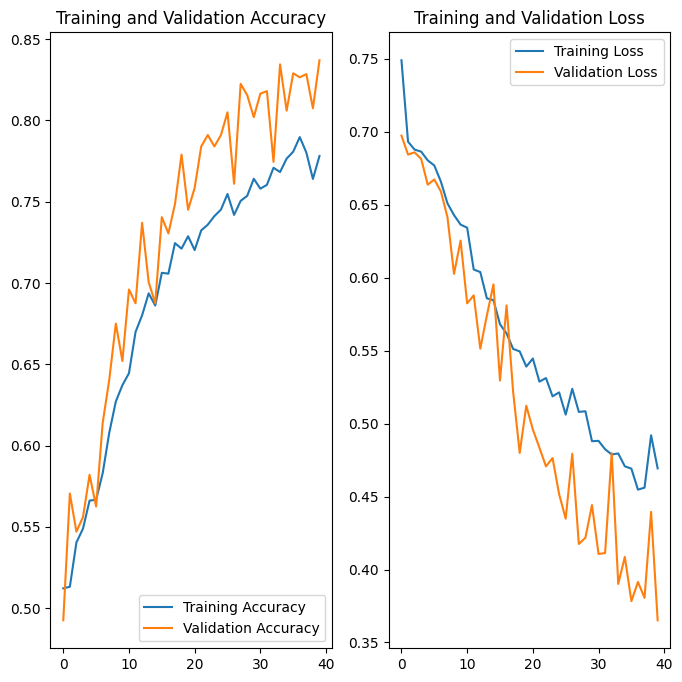

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()